# Pan Cancer EGFR 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
#sys.path.append('C:\\Users\\brittany henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f

import cptac
import cptac.utils as u

# GBM

In [2]:
brain = cptac.Gbm()


In [3]:
prot_CNV_brain = brain.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV_brain = prot_CNV_brain[["EGFR_proteomics","EGFR_CNV"]]
#do a linear regression to see if it's a meaningful association
#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_en = prot_CNV_brain.dropna(axis=0, how="any")

x1 = prot_CNV_brain[["EGFR_CNV"]].values
y1 = prot_CNV_brain[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)

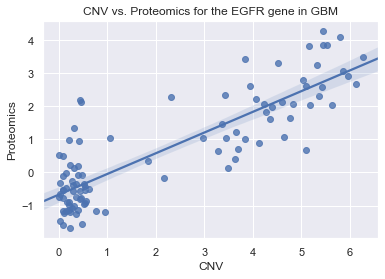

In [8]:
# plot 
sns.set(style="darkgrid")

plot = sns.regplot(x=x1, y=y1, data=CNV_genes_df)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in GBM')
plt.show()

# Kidney 

In [5]:
kidney = cptac.Ccrcc()


In [6]:
prot_and_CNV = kidney.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_and_CNV.columns = prot_and_CNV.columns.droplevel(1)
regression_list = []
interacting_gene = "EGFR"
gene = "EGFR"
prot_and_CNV = prot_and_CNV[[interacting_gene + "_proteomics",gene +"_CNV"]]
#do a linear regression to see if it's a meaningful association
#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_and_CNV = prot_and_CNV.dropna(axis=0, how="any")

x1 = prot_and_CNV[[gene+"_CNV"]].values
y1 = prot_and_CNV[[interacting_gene + "_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 0.639173353427877
R-squared: 0.14148156517003335
P-value: 5.1286239527403015e-05


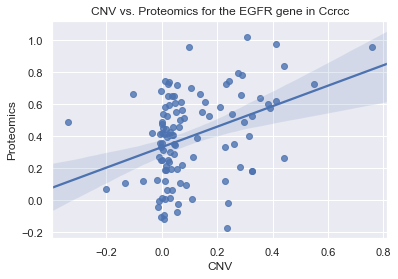

In [7]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_and_CNV)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Ccrcc')
plt.show()

# Endometrial 

In [8]:
en = cptac.Endometrial()

In [9]:
prot_CNV_en = en.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")


In [10]:
prot_CNV_en = prot_CNV_en[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV_en

Name,EGFR_proteomics,EGFR_CNV
Sample_ID,,
S001,0.383,-0.01
S002,-0.424,0.00
S003,0.410,0.01
S005,0.865,-0.05
S006,-1.760,0.17
...,...,...
S149,0.317,NaN
S150,0.749,NaN
S151,0.533,NaN


In [11]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_en = prot_CNV_en.dropna(axis=0, how="any")
prot_CNV_en


Name,EGFR_proteomics,EGFR_CNV
Sample_ID,,
S001,0.383,-0.01
S002,-0.424,0.00
S003,0.410,0.01
S005,0.865,-0.05
S006,-1.760,0.17
...,...,...
S099,-0.173,0.35
S100,-1.560,-0.08
S101,-0.597,-0.02


In [12]:

x1 = prot_CNV_en[["EGFR_CNV"]].values
y1 = prot_CNV_en[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 1.499765705578467
R-squared: 0.08131533012287467
P-value: 0.005094579874871393


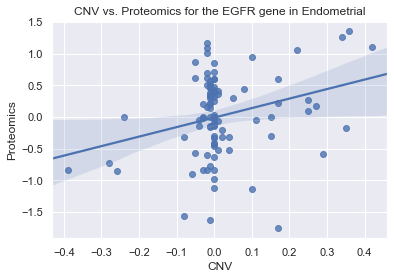

In [13]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_en)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Endometrial')
plt.show()

# Ovarian 

In [15]:
Ovar = cptac.Ovarian()

In [16]:
prot_CNV_Ovar = Ovar.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")

In [17]:
prot_CNV_Ovar = prot_CNV_Ovar[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV_Ovar

Name,EGFR_proteomics,EGFR_CNV
Database_ID,NP_005219,NaN
Sample_ID,,
S001,NaN,0.0504
S002,-0.064895,0.2544
S003,NaN,0.5310
S004,NaN,0.0287
S005,NaN,-0.0318
...,...,...
S127,0.583089,NaN
S128,1.325452,NaN


In [18]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_Ovar = prot_CNV_Ovar.dropna(axis=0, how="any")
prot_CNV_Ovar

Name,EGFR_proteomics,EGFR_CNV
Database_ID,NP_005219,NaN
Sample_ID,,
S002,-0.064895,0.254400
S006,-0.247334,0.017000
S007,-0.039963,0.134200
S009,0.147606,0.537200
S011,-0.285889,-0.140685
...,...,...
S106,-0.355215,0.522400
S107,-0.520589,0.155200


In [19]:

x1 = prot_CNV_Ovar[["EGFR_CNV"]].values
y1 = prot_CNV_Ovar[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 0.4094491941551324
R-squared: 0.09130896402443453
P-value: 0.00611220957517694


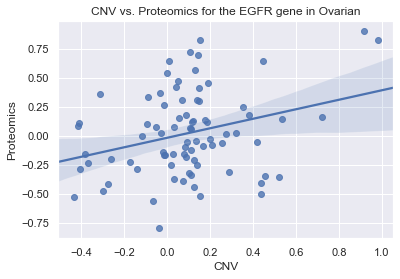

In [20]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_Ovar)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Ovarian')
plt.show()

# Colon

In [ ]:
colon = cptac.Colon()

In [ ]:
colon.list_data()

colon does not have cnv data -

# Brca 

In [22]:
brca = cptac.Brca()

In [28]:
prot_CNV_brca = brca.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")


In [29]:
prot_CNV_brca = prot_CNV_brca[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV_brca

Name,EGFR_proteomics,EGFR_CNV
Database_ID,NP_005219.2|NP_958441.1|NP_958439.1|NP_958440.1,ENSG00000146648.11
Sample_ID,,
S001,-0.4834,-0.471
S002,4.1062,1.288
S003,1.2191,2.199
S004,0.0613,0.114
S005,1.6974,0.582
...,...,...
S118,-1.5217,-0.099
S119,-0.9455,0.016


In [30]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_brca = prot_CNV_brca.dropna(axis=0, how="any")
prot_CNV_brca

Name,EGFR_proteomics,EGFR_CNV
Database_ID,NP_005219.2|NP_958441.1|NP_958439.1|NP_958440.1,ENSG00000146648.11
Sample_ID,,
S001,-0.4834,-0.471
S002,4.1062,1.288
S003,1.2191,2.199
S004,0.0613,0.114
S005,1.6974,0.582
...,...,...
S118,-1.5217,-0.099
S119,-0.9455,0.016


In [31]:

x1 = prot_CNV_brca[["EGFR_CNV"]].values
y1 = prot_CNV_brca[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 1.0265208467777605
R-squared: 0.07386388689788158
P-value: 0.003301432638642004


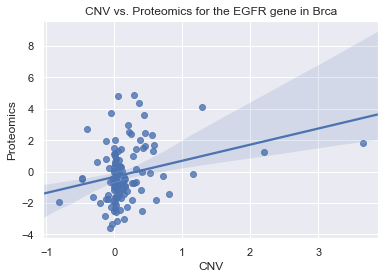

In [32]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_brca)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Brca')
plt.show()

# LUAD

In [33]:
luad = cptac.Luad()

In [34]:
prot_CNV_luad = luad.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")

In [35]:
prot_CNV_luad = prot_CNV_luad[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV_luad

Name,EGFR_proteomics,EGFR_CNV
Database_ID,NP_005219.2|NP_001333829.1|NP_001333828.1|NP_001333827.1|NP_001333826.1|NP_001333870.1|NP_958441.1|NP_958439.1|NP_958440.1,NaN
Sample_ID,,
S001,6.65186,2.3242
S002,-1.78874,0.0730
S003,-1.11964,0.1973
S004,-2.84552,0.0037
S005,-1.86221,0.2556
...,...,...
S211,-0.47929,NaN
S212,-1.28533,NaN


In [36]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_luad = prot_CNV_luad.dropna(axis=0, how="any")
prot_CNV_luad

Name,EGFR_proteomics,EGFR_CNV
Database_ID,NP_005219.2|NP_001333829.1|NP_001333828.1|NP_001333827.1|NP_001333826.1|NP_001333870.1|NP_958441.1|NP_958439.1|NP_958440.1,NaN
Sample_ID,,
S001,6.65186,2.3242
S002,-1.78874,0.0730
S003,-1.11964,0.1973
S004,-2.84552,0.0037
S005,-1.86221,0.2556
...,...,...
S109,0.56593,0.2633
S110,5.16222,4.1857


In [37]:

x1 = prot_CNV_luad[["EGFR_CNV"]].values
y1 = prot_CNV_luad[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 2.331560446096128
R-squared: 0.47897498329905835
P-value: 5.626446197398795e-17


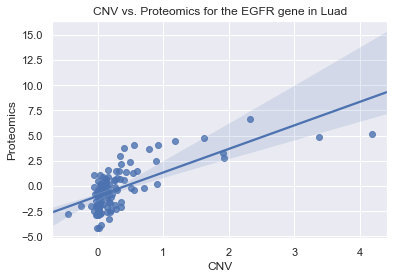

In [38]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_luad)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Luad')
plt.show()

# HNSCC

In [41]:
Hnscc = cptac.Hnscc()

In [42]:
prot_CNV_hnscc = Hnscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")

In [43]:
prot_CNV_hnscc = prot_CNV_hnscc[["EGFR_proteomics","EGFR_CNV"]]
prot_CNV_hnscc

Name,EGFR_proteomics,EGFR_CNV
Sample_ID,,
S001,315168.68750,0.061
S002,164736.96880,0.281
S003,340048.75000,0.436
S004,106232.24220,0.000
S005,166792.85940,0.312
...,...,...
S193,76236.03125,NaN
S194,68789.75000,NaN
S195,135807.34380,NaN


In [44]:
#do a linear regression to see if it's a meaningful association

#linear regression really hates it when there are NaN, right?
#dropna will remove rows with nan
prot_CNV_hnscc = prot_CNV_hnscc.dropna(axis=0, how="any")
prot_CNV_hnscc

Name,EGFR_proteomics,EGFR_CNV
Sample_ID,,
S001,315168.68750,0.061
S002,164736.96880,0.281
S003,340048.75000,0.436
S004,106232.24220,0.000
S005,166792.85940,0.312
...,...,...
S106,202981.35940,0.224
S107,91551.50000,-0.026
S108,281975.81250,0.011


In [45]:
x1 = prot_CNV_hnscc[["EGFR_CNV"]].values
y1 = prot_CNV_hnscc[["EGFR_proteomics"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 650367.9688261901
R-squared: 0.8439840658681657
P-value: 2.2462211502435147e-45


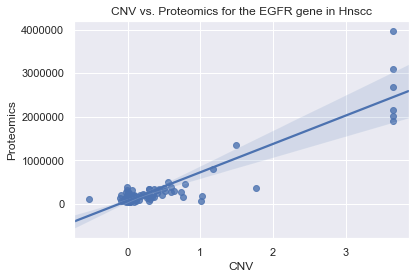

In [46]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=prot_CNV_hnscc)
plot.set(xlabel='CNV', ylabel='Proteomics', title='CNV vs. Proteomics for the EGFR gene in Hnscc')
plt.show()